
# **Qiskit** - AerSimulator


Simulador mais eficiente implementado em C++ com muitas caracteristicas não disponíveis no BasicSimulator

In [1]:
!pip install qiskit[visualization]
# Instalação do Qiskit e pacotes adicionais de visualização

!pip install qiskit-aer
# Instalação do Qiskit Aer, que fornece simuladores de alto desempenho para circuitos quânticos

!pip install qiskit-ibm-runtime
# Instalação do Qiskit IBM Quantum Runtime, permitindo acesso a recursos de computação quântica em nuvem

**Encontrando os vetores de estados em um cricuito com medições**

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

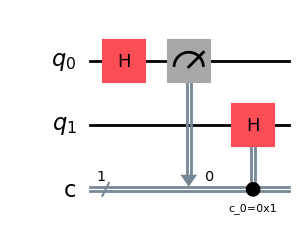

In [3]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.measure(0,0)
qc.h(1).c_if(0,1)
qc.draw('mpl')

Metade do tempo: |0> |0>

Metade do tempo: (|0>+|1>)|1>

In [4]:
psi = Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [5]:
qc_basic = transpile(qc, backend=simulator_basic)

result = simulator_basic.run(qc_basic, shots = 1024).result()
counts = result.get_counts()
print(counts)

{'0': 523, '1': 501}


In [6]:
from qiskit_aer import AerSimulator #importando o simulador Aer do pacote qiskit_aer
simulator_aer = AerSimulator() #criando um objeto como fizemos para o BasicSimulator

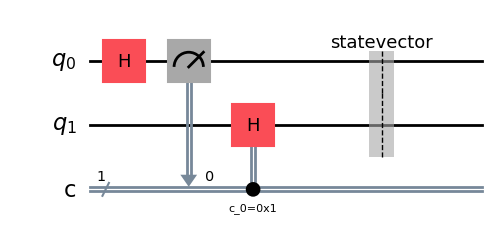

In [7]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.measure(0,0)
qc.h(1).c_if(0,1)
qc.save_statevector() #vamos introduzir este novo recurso
qc.draw('mpl')

In [8]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
#result = simulator_aer.run(qc_aer,shots=1024).result() -> Eu não preciso rodar 1024 vezes porque me interesso apenas pelo estado.
#então rodo apenas uma vez
psi = result.get_statevector()
psi.draw('latex')

<IPython.core.display.Latex object>

In [9]:
result = simulator_aer.run(qc_basic).result()
psi = result.get_statevector()
psi.draw('latex')

QiskitError: 'No statevector for experiment "None"'

Outro exemplo

In [ ]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.save_statevector()
qc.cx(0,2)
qc.cx(0,3)
qc.measure_all()
qc.draw('mpl')

In [ ]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
psi = result.get_statevector()
psi.draw('latex')

**Simuladores Eficientes**


In [ ]:
n = 24   #rode com 5; 24
qc = QuantumCircuit(n)
qc.h(0)
for i in range(0,n-1,+1):
  qc.cx(i,i+1)

qc.measure_all()
qc.draw('mpl')

In [ ]:
%%time

result = simulator_basic.run(qc, shots = 1024).result()
counts = result.get_counts()
print(counts)

In [ ]:
%%time

result = simulator_aer.run(qc, shots = 1024).result()
counts = result.get_counts()
print(counts)

In [ ]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'statevector').result()
counts = result.get_counts()
print(counts)

In [ ]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'matrix_product_state').result()
counts = result.get_counts()
print(counts)

** Inclusão de ruído**

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [ ]:
qc_aer = transpile(qc, backend=simulator_aer)

result_ideal = simulator_aer.run(qc_aer, shots = 1024).result()
counts_ideal = result_ideal.get_counts()

In [ ]:
from qiskit.visualization import plot_distribution

plot_distribution(counts_ideal)

In [ ]:
from qiskit_aer import noise

In [ ]:
prob = 0.1
error = noise.depolarizing_error(prob,2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error,['cx'])
basis_gate = noise_model.basis_gates

result_noisy = simulator_aer.run(qc,
                                 shots = 1024,
                                 noise_model = noise_model).result()

counts_noisy = result_noisy.get_counts()

In [ ]:
plot_distribution([counts_ideal,counts_noisy], title = 'Noiseless vs. Noisy Simulated counts')

# **Resumo:**

**Use o AerSimulator para fazer:**

* contagens/amostras em circuitos grandes
* encontrar o statevector/density matriz ed um circuito com medições
* simular circuitos com ruídos

**Não use para:**

* corresponder ao formato de saída do qiskit IBM runtime